In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

url = "https://umsltritons.com/sports/mens-basketball/stats/2023-24"
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the section with id 'team'
    team_section = soup.find('section', id='team')

    # Check if the section is found
    if team_section:
        # Find the table containing basketball stats within the 'team' section
        team_stats_table = team_section.find('table')

        # Check if the table is found
        if team_stats_table:
            # Extract the statistics based on the HTML structure of the table
            team_stats = team_stats_table.find_all('tr')

            # Create a list to hold the rows of data
            data = []

            # Loop through each row in the table
            for stat in team_stats:
                # Extract data from each column (td) in the row
                row_data = [td.text.strip() for td in stat.find_all('td')]
                
                # Append the row data to the list
                data.append(row_data)

            # Create a Pandas DataFrame from the list of data
            df = pd.DataFrame(data)
            
        else:
            print("Table not found within the 'team' section.")
    else:
        print("Section with id 'team' not found. Check the id attribute.")

else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

# Clean the data
new_column_names = {0: 'Stat', 1: 'UMSL', 2: 'Opponent'}
df.columns = [new_column_names[col] for col in df.columns]

df_clean = df[df != '--'].dropna()
df_clean = df_clean.dropna()

exclude_values = ['\nTOT', 'Player_Total', 'Per Game\nAVG']
df_clean = df_clean[~df_clean['Stat'].str.contains('|'.join(exclude_values))]

unwanted_characters = ['Points Per Game\n', 'FG: Made-Attempted\n', 'FG: Percentage\n', 'FG: Per Game\n', '3PT: Made-Attempted\n', '3PT: Percentage\n', '3PT: Per Game\n', 'FT: Made-Attempted\n', 'FT: Percentage\n', 'FT: Per Game\n', 'Per Game\n', 'Assist/Turnover Ratio\n', 'Points Off Turnovers\n']
df_clean['Stat'].replace(unwanted_characters, '', regex=True, inplace=True)

df_clean = df_clean.reset_index(drop=True)

df_clean

/tmp/ipykernel_29952/685955885.py:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Stat'].replace(unwanted_characters, '', regex=True, inplace=True)


,Stat,UMSL,Opponent
0,PPG,68.0,71.6
1,FGM-FGA,736-1551,747-1585
2,FG%,.475,.471
3,FGM/G,25.4,25.8
4,3PT-3PA,197-559,247-641
5,3PT%,.352,.385
6,3PT/G,6.8,8.5
7,FTM-FTA,304-433,334-436
8,FT%,.702,.766
9,FT/G,10.5,11.5


In [3]:
melted_df = pd.melt(df_clean, id_vars=['Stat'], var_name='Team', value_name='Value')
melted_df

,Stat,Team,Value
0,PPG,UMSL,68.0
1,FGM-FGA,UMSL,736-1551
2,FG%,UMSL,.475
3,FGM/G,UMSL,25.4
4,3PT-3PA,UMSL,197-559
5,3PT%,UMSL,.352
6,3PT/G,UMSL,6.8
7,FTM-FTA,UMSL,304-433
8,FT%,UMSL,.702
9,FT/G,UMSL,10.5


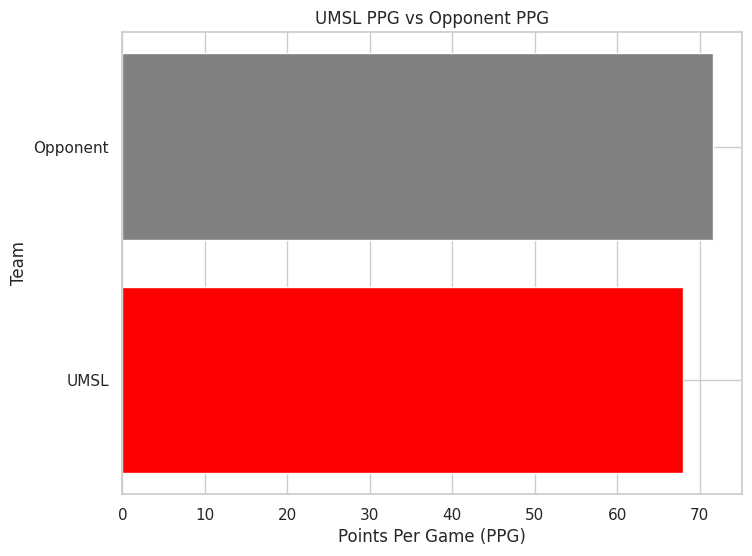

In [4]:
ppg_df = melted_df[melted_df['Stat'] == 'PPG'].copy()
ppg_df['Value'] = ppg_df['Value'].astype(float)

# Plot a horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(ppg_df['Team'], ppg_df['Value'], color=['red', 'gray'])
plt.xlabel('Points Per Game (PPG)')
plt.ylabel('Team')
plt.title('UMSL PPG vs Opponent PPG')

plt.show()